# Problem statement

##### Forecasting passengenter count for airlines from the given dataset

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 


C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the dataset

In [2]:
airlines =pd.read_excel("Airlines+Data.xlsx")

In [3]:
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
airlines.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# Data Insights

In [6]:
airlines.shape

(96, 2)

In [7]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


### Observations :- 

1. We have two columns Month and Passengers. Month is of datetype column and Passengers is of int type
2. There are total 96 observations and we don't have any null values in our dataset

In [8]:
airlines[airlines.duplicated()]

,Month,Passengers


##### There are no duplicate values in our data

# Summary statistics 

In [9]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Data visualization

<AxesSubplot:>

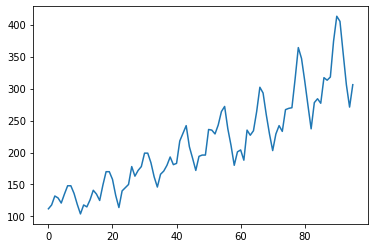

In [10]:
airlines.Passengers.plot()

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Passengers'>

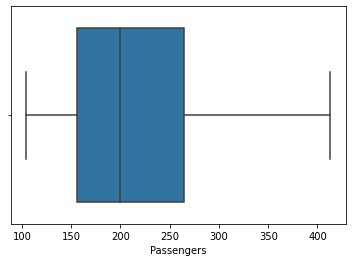

In [11]:
sns.boxplot(airlines['Passengers'])

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


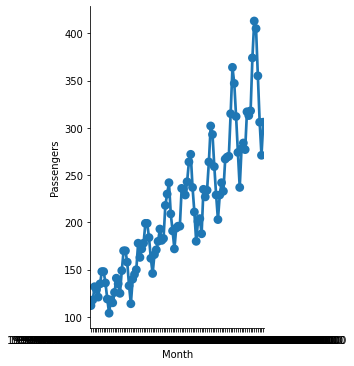

In [12]:
sns.factorplot("Month","Passengers",data=airlines)


# Data Driven models

### Moving average##

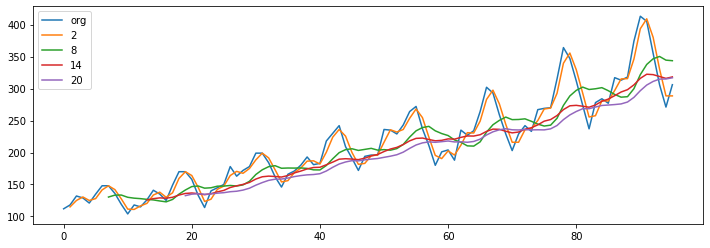

In [13]:
plt.figure(figsize=(12,4))
airlines.Passengers.plot(label="org")
for i in range(2,24,6):
    airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot 


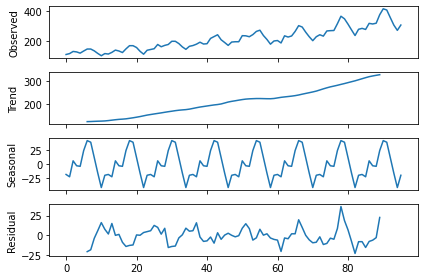

In [14]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="additive")
decompose_ts_add.plot()
plt.show()

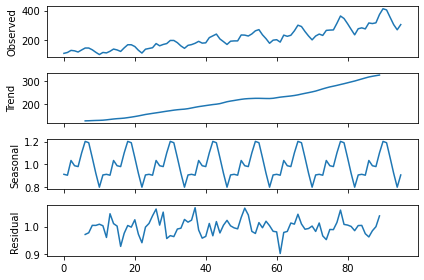

In [15]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12,model="multiplicative")
decompose_ts_add.plot()
plt.show()

# ACF and PACF plots

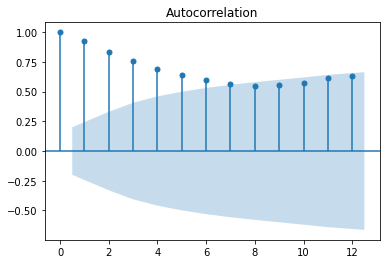

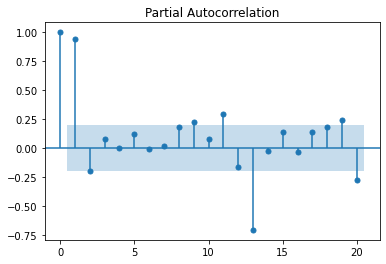

In [16]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers)
plt.show()


# Splitting data into train and test

In [17]:
train = airlines.head(70)
test = airlines.tail(26)

### Evaluation Metric MAPE

In [18]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [19]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Passengers) 


22.07625688705707

### Holt method 

In [20]:
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

15.417980994777425

### Holts winter exponential smoothing with additive seasonality and additive trend


In [21]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers) 

C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


8.68323268030271

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [22]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)

9.103967967088405

## Final Model by combining train and test

##### We have got the least MAPE value for Holts winter exponential smoothing with additive seasonality and additive trend technique, so we will use it for our final model

In [23]:
hwe_model_add_add = ExponentialSmoothing(airlines["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model


C:\Users\91982\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


##### Forecasting 10 future values

In [24]:
hwe_model_add_add.forecast(10)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060923
101    408.899129
102    446.143114
103    433.358026
104    382.762460
105    336.170254
dtype: float64

In [25]:
hwe_model_add_add.params

{'smoothing_level': 0.26315789342091594,
 'smoothing_slope': 0.051714049510010816,
 'smoothing_seasonal': 0.7368421039472317,
 'damping_slope': nan,
 'initial_level': 182.83012495402383,
 'initial_slope': 1.7013561043521734,
 'initial_seasons': array([-71.41890349, -65.44065694, -51.52122089, -54.63707221,
        -62.6751978 , -48.66770777, -35.69835601, -35.80249979,
        -47.88461108, -64.94281919, -79.88195392, -65.72379745]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

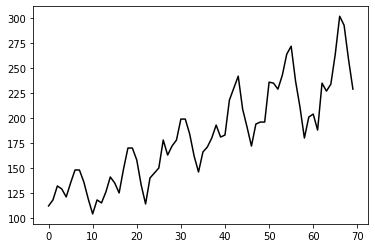

In [26]:
plt.plot(train.index, train["Passengers"], label='Train',color="black")

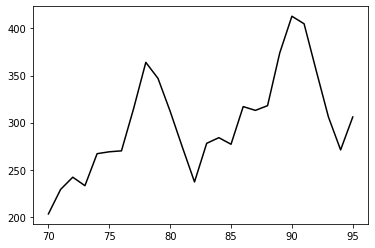

In [27]:
plt.plot(test.index, test["Passengers"], label='Test',color="black")

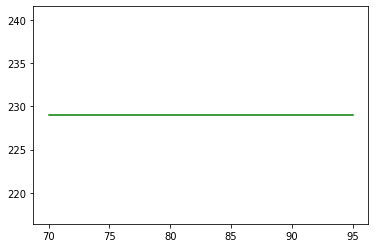

In [28]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

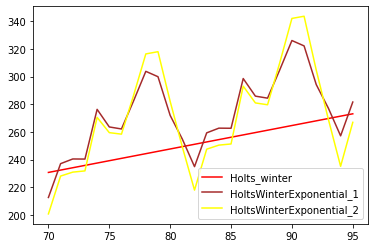

In [29]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

# Model based methods

In [30]:
airlines["Date"] = pd.to_datetime(airlines["Month"],format="%b-%y")
#look for c standard format codes
airlines

,Month,Passengers,Date
0,1995-01-01,112,1995-01-01
1,1995-02-01,118,1995-02-01
2,1995-03-01,132,1995-03-01
3,1995-04-01,129,1995-04-01
4,1995-05-01,121,1995-05-01
...,...,...,...
91,2002-08-01,405,2002-08-01
92,2002-09-01,355,2002-09-01
93,2002-10-01,306,2002-10-01
94,2002-11-01,271,2002-11-01


#### Extracting Day, weekday name, month name, year from the Date column using  Date functions from pandas 

In [31]:
airlines["month"] = airlines.Date.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Date.dt.strftime("%Y") # year extraction

In [32]:
airlines

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [33]:
t= np.arange(1,97)
airlines['t']=t
airlines['t_square']=airlines['t']*airlines['t']


In [34]:
log_Passengers=np.log(airlines['Passengers'])
airlines['log_Passengers']=log_Passengers

In [35]:
airlines = pd.get_dummies(airlines,columns=['month'])

In [36]:
airlines.head(15)

,Month,Passengers,Date,year,t,t_square,log_Passengers,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995-01-01,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
5,1995-06-01,135,1995-06-01,1995,6,36,4.905275,0,0,0,0,0,0,1,0,0,0,0,0
6,1995-07-01,148,1995-07-01,1995,7,49,4.997212,0,0,0,0,0,1,0,0,0,0,0,0
7,1995-08-01,148,1995-08-01,1995,8,64,4.997212,0,1,0,0,0,0,0,0,0,0,0,0
8,1995-09-01,136,1995-09-01,1995,9,81,4.912655,0,0,0,0,0,0,0,0,0,0,0,1
9,1995-10-01,119,1995-10-01,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,0,1,0


# Splitting into train and test

In [37]:
train = airlines.head(70)
test = airlines.tail(26)

# Linear model

In [38]:
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

17.6818799082118

# Quadratic model

In [39]:
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

43.898144967424926

# Exponential model


In [40]:
expo=smf.ols('log_Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo


43.47847070446902

# Additive seasonality


In [42]:
additive = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predadd = pd.Series(additive.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))
rmseadd = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

124.9756995182882

# Additive seasonality with linear trend


In [44]:
addlinear = smf.ols('Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.502089794271235

# Additive seasonality with quadratic trend

In [45]:
addquad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predaddquad = pd.Series(addquad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

30.393042895920612

# Multiplicative seasonality


In [46]:
mulsea = smf.ols('log_Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmul = pd.Series(mulsea.predict(test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemul=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmul))**2))
rmsemul

298.6798189957354

# Multiplicative seasonality with linear trend

In [47]:
mullin = smf.ols('log_Passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
predmullin = pd.Series(mullin.predict(test[['t','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predmullin))**2))
rmsemul

298.6798189957354

# Multiplicative seasonality with quadratic trend

In [48]:
mul_quad = smf.ols('Passengers~t+t_square+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+\
month_Aug+month_Sep+month_Oct+month_Nov+month_Dec',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun',\
                                               'month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','month_Dec']]))

rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_mul_quad))**2))
rmse_mul_quad

30.393042895920612

# Tabulating the RMSE values for comparison

In [49]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['Values'])

,Model,Values
5,rmselin,17.681880
0,rmse_mul_quad,30.393043
3,rmseaddquad,30.393043
2,rmseaddlinear,34.502090
4,rmseexpo,43.478471
8,rmsequad,43.898145
1,rmseadd,124.975700
7,rmsemulin,298.136614
6,rmsemul,298.679819


##### We could see that the Linear model shows the least RMSE value, so it is the most suitable model for our data